In [91]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU

def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )



In [2]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0],[1], [1], [0] ])

In [6]:
# 신경망은 한개, 입력값은 2개

model = Sequential()

model.add(Dense(1, input_dim=2))
model.add(Activation('sigmoid'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


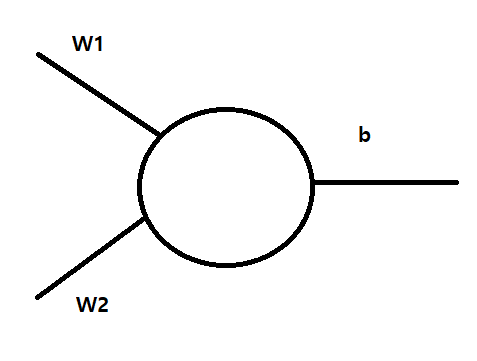

In [8]:
model = Sequential()

# 은닉층(hidden layer)의 개수
model.add(Dense(5, input_dim=2))
model.add(Activation('sigmoid'))

# 출력층의 개수
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_8 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
_________________________________________________________________
activation_9 (Activation)    (None, 1)                 0         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


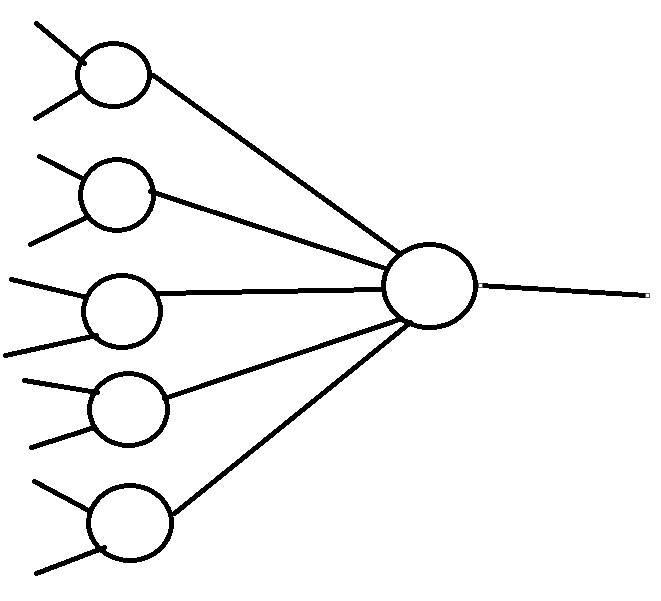

In [9]:
# adam은 자기가 알아서 해줌
model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0],[1], [1], [0] ])

# 전체 데이터 개수는 4개, 700번 반복하란 소리
model.fit(X,y, batch_size=4, epochs = 700, verbose=0)
print(model.predict_proba(X)) # 행렬은 4 X 1 이다. sample 수 x 클래스수이미르

[[1.11627465e-07]
 [9.99997377e-01]
 [9.99996901e-01]
 [5.52007396e-06]]


In [34]:
p = model.predict_proba(X)
print((p > 0.5)*1)

[[0]
 [1]
 [1]
 [0]]


-----

## Exercise1

In [35]:
model = Sequential()

# 은닉층(hidden layer)의 개수
model.add(Dense(3, input_dim=2))
model.add(Activation('sigmoid'))

# 출력층의 개수
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 3)                 9         
_________________________________________________________________
activation_10 (Activation)   (None, 3)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
_________________________________________________________________
activation_11 (Activation)   (None, 1)                 0         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [36]:
# adam은 자기가 알아서 해줌
model.compile(loss='binary_crossentropy', optimizer='adam')

In [37]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0],[1], [1], [0] ])

# 전체 데이터 개수는 4개, 2000번 반복하란 소리
model.fit(X,y, batch_size=4, epochs = 3000, verbose=0)
print(model.predict_proba(X)) # 행렬은 4 X 1 이다. sample 수 x 클래스수이미르

[[0.10597483]
 [0.8012724 ]
 [0.82888436]
 [0.2719233 ]]


(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


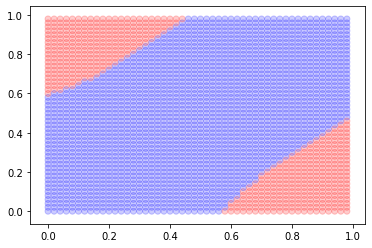

In [38]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

---

## Exercise2

In [48]:
model = Sequential()

# 은닉층(hidden layer)의 개수
model.add(Dense(10, input_dim=2))
model.add(Activation('sigmoid'))

# 출력층의 개수
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_18 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
_________________________________________________________________
activation_19 (Activation)   (None, 1)                 0         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [49]:
# adam은 자기가 알아서 해줌
model.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0],[1], [1], [0] ])

# 전체 데이터 개수는 4개, 2000번 반복하란 소리
model.fit(X,y, batch_size=4, epochs = 3000, verbose=0)
print(model.predict_proba(X)) # 행렬은 4 X 1 이다. sample 수 x 클래스수이미르

[[0.08756161]
 [0.853727  ]
 [0.87580705]
 [0.15515739]]


(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


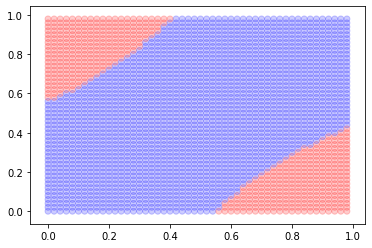

In [51]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

---

## Exercise3

In [42]:
model = Sequential()

model.add(Dense(10, input_dim=2))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_14 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_15 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [43]:
# adam은 자기가 알아서 해줌
model.compile(loss='binary_crossentropy', optimizer='adam')

In [44]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0],[1], [1], [0] ])

# 전체 데이터 개수는 4개, 2000번 반복하란 소리
model.fit(X,y, batch_size=4, epochs = 3000, verbose=0)
print(model.predict_proba(X)) # 행렬은 4 X 1 이다. sample 수 x 클래스수이미르

[[7.3489390e-04]
 [9.9871397e-01]
 [9.9870265e-01]
 [1.1799206e-03]]


In [45]:
p = model.predict_proba(X)
print((p > 0.5)*1)

[[0]
 [1]
 [1]
 [0]]


(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


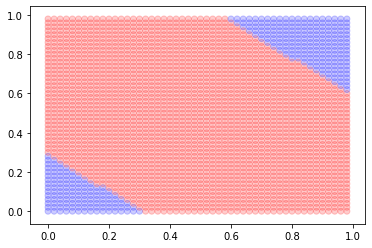

In [46]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

---

## Exercise 4

In [52]:
model = Sequential()

model.add(Dense(10, input_dim=2))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(5))
model.add(Activation('sigmoid'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_20 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_21 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_22 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)              

In [53]:
# adam은 자기가 알아서 해줌
model.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0],[1], [1], [0] ])

# 전체 데이터 개수는 4개, 2000번 반복하란 소리
model.fit(X,y, batch_size=4, epochs = 3000, verbose=0)
print(model.predict_proba(X)) # 행렬은 4 X 1 이다. sample 수 x 클래스수이미르

[[0.00382652]
 [0.6661652 ]
 [0.666184  ]
 [0.6662014 ]]


(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


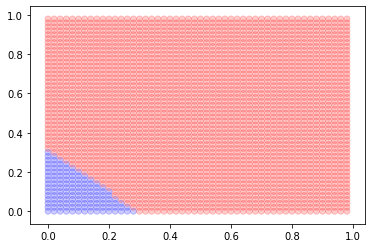

In [55]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

---

(500,)


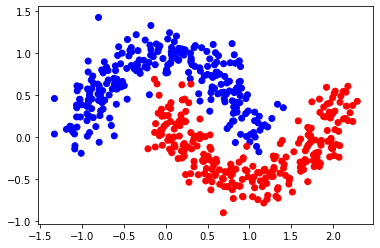

In [88]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

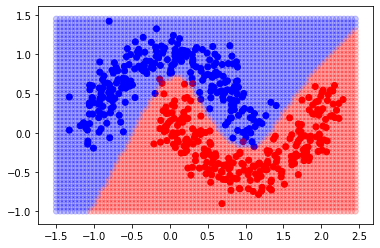

In [90]:
model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer=Adam(0.01))  
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data))

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

In [97]:
model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), 
             metrics=['accuracy'])  
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data),
         callbacks=[printepoch(500)]) ## 위와 다르게 새로 추가된 코드

0 => {'val_loss': 0.7397233843803406, 'val_accuracy': 0.5, 'loss': 0.7699287176132202, 'accuracy': 0.5}
500 => {'val_loss': 0.027198276855051516, 'val_accuracy': 0.9860000014305115, 'loss': 0.030917302519083024, 'accuracy': 0.986}
1000 => {'val_loss': 0.024231123831123115, 'val_accuracy': 0.9900000095367432, 'loss': 0.024776912480592727, 'accuracy': 0.988}
1500 => {'val_loss': 0.024024081509560348, 'val_accuracy': 0.9900000095367432, 'loss': 0.027453044801950453, 'accuracy': 0.986}
2000 => {'val_loss': 0.026720148883759974, 'val_accuracy': 0.9879999756813049, 'loss': 0.024059081356972455, 'accuracy': 0.99}
2500 => {'val_loss': 0.023960494622588157, 'val_accuracy': 0.9879999756813049, 'loss': 0.025586589798331262, 'accuracy': 0.988}


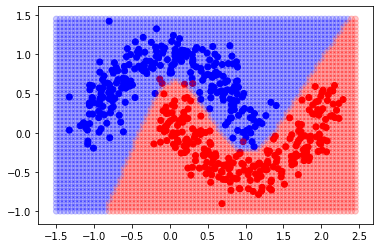

In [98]:
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

---

In [105]:
model = Sequential([
    Dense(5, activation=LeakyReLU(alpha=0.1), input_dim=2),   
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer="adam", 
             metrics=['accuracy'])

In [108]:
model.fit(x_data, y_data, batch_size=100, epochs=1001, verbose=0,
          validation_data=(x_data, y_data),
         callbacks=[printepoch(500)]) ## 위와 다르게 새로 추가된 코드

0 => {'val_loss': 0.00485614895587787, 'val_accuracy': 0.9980000257492065, 'loss': 0.005666957766516134, 'accuracy': 0.998}
500 => {'val_loss': 0.0048113694851053875, 'val_accuracy': 0.9980000257492065, 'loss': 0.005166743049630895, 'accuracy': 0.998}
1000 => {'val_loss': 0.004871000556158833, 'val_accuracy': 0.9980000257492065, 'loss': 0.005033463308063801, 'accuracy': 0.998}


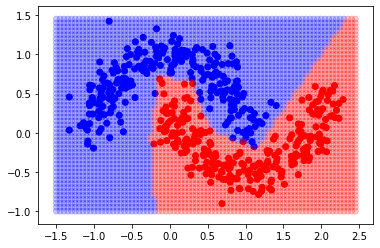

In [109]:
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

---

In [111]:
def createModel(layers, activation, input_dim) :    
    model = Sequential()        
    d = layers.pop(0)
    model.add(Dense(d, activation=activation,input_dim =input_dim))
    for l in layers :
        model.add(Dense(l, activation=activation))
    model.add(Dense(1, activation='sigmoid'))    
    return model

    
model = createModel([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5], LeakyReLU(alpha=0.1), 2) 